In [3]:
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.image as im
from sklearn.svm import LinearSVC
import cv2
from sklearn.preprocessing import StandardScaler
import glob
from sklearn.cross_validation import train_test_split
from skimage.feature import hog
from scipy.ndimage.measurements import label

car = []
non_car = []

non_car1 = (glob.glob('/home/indhu/Videos/object_detection data/*.png'))

car1 = (glob.glob('/home/indhu/Videos/object_detection_data2/*.png'))



for image in car1:
    image = cv2.imread(image)
    
    car.append(image)
    

for image in car1[:3000]:
    image = cv2.imread(image)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    for x in range(0, len(hsv)):
        for y in range(0, len(hsv[0])):
            hsv[x, y][2] -= 20

    image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    car.append(image)
    
for image in car1[3000:6000]:
    image = cv2.imread(image)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    for x in range(0, len(hsv)):
        for y in range(0, len(hsv[0])):
            hsv[x, y][2] += 20

    image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    car.append(image)




    
for image in non_car1:
    image = cv2.imread(image)
    non_car.append(image)
    
for image in non_car1[:4000]:
    image = cv2.imread(image)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    for x in range(0, len(hsv)):
        for y in range(0, len(hsv[0])):
            hsv[x, y][2] += 20

    image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    non_car.append(image)
    
for image in non_car1[4000:8000]:
    image = cv2.imread(image)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    for x in range(0, len(hsv)):
        for y in range(0, len(hsv[0])):
            hsv[x, y][2] -= 20

    image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    non_car.append(image)

car = np.array(car)
non_car = np.array(non_car)


print(car.shape)
print(non_car.shape)


f,(a1,a2) = mp.subplots(1,2)
a1.imshow(car[50])
a2.imshow(non_car[5000])

a1.set_title("Car Image")
a2.set_title("Non Car Image")

/home/indhu/anaconda3/envs/IntroToTensorFlow/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(12941, 64, 64, 3)
(16968, 64, 64, 3)


Text(0.5,1,'Non Car Image')

In [4]:
from scipy.ndimage.measurements import label
from sklearn.model_selection import GridSearchCV
def spacial_binning(image,size):

    image = cv2.resize(image,size).ravel()
    return image


def color_hist(img, nbins=32, bins_range=(0, 256)):
    
    blue  = np.histogram(image[:,:,0],bins = nbins , range = (0,256))
    green  = np.histogram(image[:,:,1],bins = nbins , range = (0,256))
    red  = np.histogram(image[:,:,2],bins = nbins , range = (0,256)) 
    
    hist_features = np.concatenate((blue[0],green[0],red[0]))
    return hist_features

def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), block_norm= 'L2-Hys',
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), block_norm= 'L2-Hys',
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features



def extract_features(images,nbins=32,size=(32,32),cspace='RGB',orient=9, 
                        pix_per_cell=8, cell_per_block=2):
    
    features = []
    for image in images:
        
        if cspace == 'RGB':
            image = np.copy(image)
    
        elif cspace == 'HLS':
            image = cv2.cvtColor(image , cv2.COLOR_BGR2HLS)
    
        elif cspace == 'HSV':
            image = cv2.cvtColor(image , cv2.COLOR_BGR2HSV)
        
        elif cspace == 'LUV':
            image = cv2.cvtColor(image , cv2.COLOR_BGR2LUV)
        
        elif cspace == 'YUV':
            image = cv2.cvtColor(image , cv2.COLOR_BGR2YUV)
            
        elif cspace == 'YCrCb':
            image = cv2.cvtColor(image , cv2.COLOR_BGR2YCrCb)
        
        spacial_features = spacial_binning(image,size)
        hist_features = color_hist(image,nbins)
        hog_features = []
        
        ch1 = image[:,:,0]
        ch2 = image[:,:,1]
        ch3 = image[:,:,2]
        
        window = 64
        cells_per_step = 2
        nx_windows = (window // pix_per_cell) - cell_per_block + 1
        
        
        
        hog1 = get_hog_features(ch1,orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec= False)
        hog2 = get_hog_features(ch2,orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec= False)
        hog3 = get_hog_features(ch3,orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec= False)
       
        
        hog_feat1 = hog1[0:nx_windows , 0:nx_windows].ravel()
        hog_feat2 = hog2[0:nx_windows , 0:nx_windows].ravel()
        hog_feat3 = hog3[0:nx_windows , 0:nx_windows].ravel()
        
        hog_features = np.hstack((hog_feat1,hog_feat2,hog_feat3))
    
        features.append(np.concatenate((spacial_features, hist_features,hog_features)))
        
    return features



size = (32,32)
nbins = 32
orient = 9
pixels = 8
cells = 8






car_features = extract_features(car,cspace = 'YCrCb',nbins = nbins,size=size,orient=orient, 
                        pix_per_cell=pixels, cell_per_block=cells)
noncar_features = extract_features(non_car,cspace = 'YCrCb',nbins = nbins,size=size,orient=orient, 
                        pix_per_cell=pixels, cell_per_block=cells) 

print(len(car_features))
print(len(noncar_features))





    

12941
16968


In [5]:
#Classifier Training

X = np.vstack((car_features,noncar_features)).astype(np.float64)
y = np.hstack((np.ones(len(car_features)),(np.zeros(len(noncar_features)))))

rand_state = np.random.randint(0,100)

print(X.shape)
print(y.shape)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = rand_state)
    
x_transform = StandardScaler().fit(X_train)

X_train = x_transform.transform(X_train)
X_test = x_transform.transform(X_test)


svc = LinearSVC()
svc.fit(X_train , y_train)
print(svc.score(X_test,y_test))

(29909, 4896)
(29909,)
0.9764292878635907


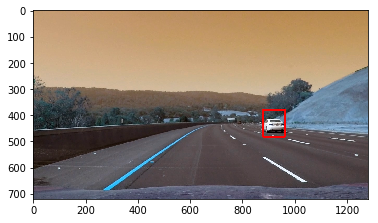

In [9]:
def convert_color(image,cspace='RGB'):
    
        features = []
    
        
        if cspace == 'RGB':
            image = np.copy(image)
    
        elif cspace == 'HLS':
            image = cv2.cvtColor(image , cv2.COLOR_BGR2HLS)
    
        elif cspace == 'HSV':
            image = cv2.cvtColor(image , cv2.COLOR_BGR2HSV)
        
        elif cspace == 'LUV':
            image = cv2.cvtColor(image , cv2.COLOR_BGR2LUV)
        
        elif cspace == 'YUV':
            image = cv2.cvtColor(image , cv2.COLOR_BGR2YUV)
            
        elif cspace == 'YCrCb':
            image = cv2.cvtColor(image , cv2.COLOR_BGR2YCrCb)
        
        
        
        return image
    
    
    


def add_heatmap(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap

def apply_threshold(heat_img,threshold):
    
    heat_img[heat_img<=threshold] = 0
    
    return heat_img

def draw_labelled_boxes(img,labels):
    
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (255,0,0), 6)
    # Return the image
    return img
    
    
        

    
def find_cars(image,y_start,y_end,svc,x_transform,nbins=32,size=(32,32),cspace='RGB',orient=9, 
                        pix_per_cell=8, cell_per_block=2):
    
    box = []
    heat_img = np.zeros_like(image[:,:,2]).astype(np.float)
    ##scale = [0.9,0.95]
    scale = [1,1.3,1.4,1.47,1.5,2,2.5,3]
    
    draw_img1 = np.copy(image)
    #print(image.shape)
    img_search = image[y_start:y_end,340:,:]
    mp.imshow(img_search)
    c_trans_a = convert_color(img_search,cspace='YCrCb')
    
    y_start_w = 0
    y_stop = 100
    
    for i in range(0,len(scale)):
        
        y_start1 = y_start_w + (5*i)  
        y_stop1 = np.int((100*scale[i]))  
        #print(y_start1)
        #print(y_stop1)
        c_trans = c_trans_a[y_start1:y_stop1,:,:]
        
    
        if scale[i] != 1:
            imshape = c_trans.shape
            c_trans = cv2.resize(c_trans, (np.int(imshape[1]/(scale[i])), np.int(imshape[0]/scale[i])))
    
        ch1 = c_trans[:,:,0]
        ch2 = c_trans[:,:,1]
        ch3 = c_trans[:,:,2]
    
        nx_blocks = (ch1.shape[1] // pix_per_cell) - cell_per_block +1
        ny_blocks = (ch1.shape[0] // pix_per_cell) - cell_per_block +1
    
        window = 64
        cells_per_step = 2
        nx_windows = (window // pix_per_cell) - cell_per_block + 1
    
        nx = (nx_blocks-nx_windows) // cells_per_step +1
        ny = (ny_blocks-nx_windows) // cells_per_step +1
    
        hog1 = get_hog_features(ch1,orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec= False)
        hog2 = get_hog_features(ch2,orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec= False)
        hog3 = get_hog_features(ch3,orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec= False)
    
        for x in range (nx):
            for y in range(ny):
            
                ypos = y * cells_per_step
                xpos = x * cells_per_step
                hog_feat1 = hog1[ypos:ypos+nx_windows , xpos:xpos+nx_windows].ravel()
                hog_feat2 = hog2[ypos:ypos+nx_windows , xpos:xpos+nx_windows].ravel()
                hog_feat3 = hog3[ypos:ypos+nx_windows , xpos:xpos+nx_windows].ravel()
            
                hog_features = np.hstack((hog_feat1,hog_feat2,hog_feat3))
            
            
                xleft = xpos * pix_per_cell
                ytop = ypos * pix_per_cell
            
                sub_img = cv2.resize(c_trans[ytop:ytop + window,xleft:xleft+window],(64,64))
            
                spacial_features = spacial_binning(sub_img,size)
                hist_features = color_hist(sub_img,nbins)
                #print(hist_features)
            
                features = x_transform.transform(np.hstack((spacial_features,hist_features,hog_features)).reshape(1,-1))
                                             
                prediction = svc.predict(features)
            
                if prediction == 1:
                
                
                    xbox_left = np.int(xleft*scale[i])+340
                    ytop_draw = np.int(ytop*scale[i])
                    win_drawx = np.int(window*scale[i])
                    win_drawy = np.int(window*scale[i])
                    box.append(((xbox_left, ytop_draw+y_start) , (xbox_left+win_drawx,ytop_draw+win_drawy+y_start)))
                    #cv2.rectangle(draw_img1,(xbox_left, ytop_draw+y_start),(xbox_left+win_drawx,ytop_draw+win_drawy+y_start),(0,0,255),6) 
                                            
                    #cv2.rectangle(draw_img,(xleft,ytop+y_start),(xleft+windows,ytop+windows+y_start),(0,0,255),6)
                                             
    heatmap = add_heatmap(heat_img,box)
    #mp.imshow(heatmap)
    heat_map = apply_threshold(heatmap,4)
    #mp.imshow(heatmap)
    labels = label(heat_map)
    #mp.imshow(labels[0])
    draw_img = draw_labelled_boxes(draw_img1 , labels)
    mp.imshow(draw_img)
    return draw_img      
            
            


image = cv2.imread('/home/indhu/CarND-Vehicle-Detection-P5/test_images/test3.jpg')

#image = cv2.imread('/home/indhu/image3.jpg')

#mp.imshow(image)

#image = np.array(image)
x_start = 0
y_start = 380
x_stop = 1280
y_stop = 680

image1 = find_cars(image = image ,y_start = y_start,y_end = y_stop , svc = svc, x_transform = x_transform ,cspace = 'RGB',nbins = nbins,size=size,orient=orient, 
                        pix_per_cell=pixels, cell_per_block=cells)

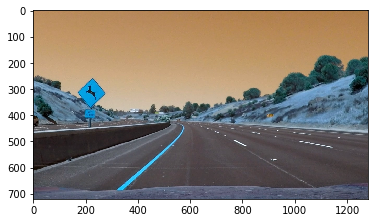

In [78]:
image = cv2.imread('/home/indhu/CarND-Vehicle-Detection-P5/test_images/test2.jpg')
image1 = find_cars(image = image ,y_start = y_start,y_end = y_stop , svc = svc, x_transform = x_transform ,cspace = 'RGB',nbins = nbins,size=size,orient=orient, 
                        pix_per_cell=pixels, cell_per_block=cells)

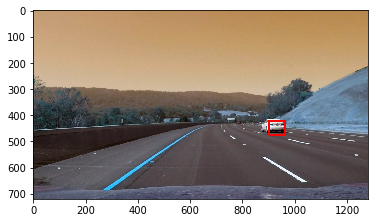

In [79]:
image = cv2.imread('/home/indhu/CarND-Vehicle-Detection-P5/test_images/test3.jpg')
image1 = find_cars(image = image ,y_start = y_start,y_end = y_stop , svc = svc, x_transform = x_transform ,cspace = 'RGB',nbins = nbins,size=size,orient=orient, 
                        pix_per_cell=pixels, cell_per_block=cells)

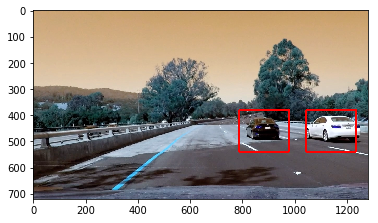

In [80]:
image = cv2.imread('/home/indhu/CarND-Vehicle-Detection-P5/test_images/test4.jpg')
image1 = find_cars(image = image ,y_start = y_start,y_end = y_stop , svc = svc, x_transform = x_transform ,cspace = 'RGB',nbins = nbins,size=size,orient=orient, 
                        pix_per_cell=pixels, cell_per_block=cells)

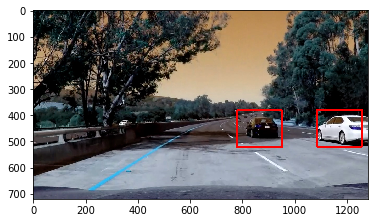

In [81]:
image = cv2.imread('/home/indhu/CarND-Vehicle-Detection-P5/test_images/test5.jpg')
image1 = find_cars(image = image ,y_start = y_start,y_end = y_stop , svc = svc, x_transform = x_transform ,cspace = 'RGB',nbins = nbins,size=size,orient=orient, 
                        pix_per_cell=pixels, cell_per_block=cells)

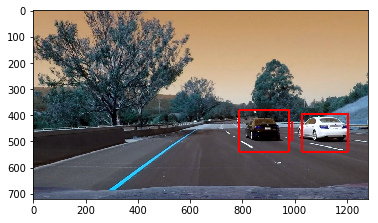

In [82]:
image = cv2.imread('/home/indhu/CarND-Vehicle-Detection-P5/test_images/test6.jpg')
image1 = find_cars(image = image ,y_start = y_start,y_end = y_stop , svc = svc, x_transform = x_transform ,cspace = 'RGB',nbins = nbins,size=size,orient=orient, 
                        pix_per_cell=pixels, cell_per_block=cells)

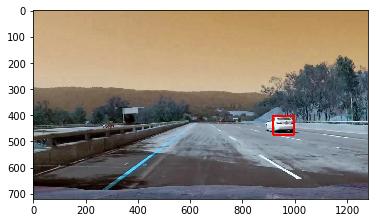

In [83]:
image = cv2.imread('/home/indhu/image.jpg')
image1 = find_cars(image = image ,y_start = y_start,y_end = y_stop , svc = svc, x_transform = x_transform ,cspace = 'RGB',nbins = nbins,size=size,orient=orient, 
                        pix_per_cell=pixels, cell_per_block=cells)

In [ ]:
cap = cv2.VideoCapture('/home/indhu/CarND-Vehicle-Detection-P5/project_video.mp4')
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('/home/indhu/output_final1.avi',fourcc, 25.0, (1280,720))
count = 0
while(cap.isOpened()):
    ret, image = cap.read()
    if ret==True:
        #count = count+1
        #if count == 120:
            #cv2.imwrite('/home/indhu/image4.jpg',image)
            
        image1 = find_cars(image = image ,y_start = y_start,y_end = y_stop , svc = svc, x_transform = x_transform ,cspace = 'RGB',nbins = nbins,size=size,orient=orient, 
                        pix_per_cell=pixels, cell_per_block=cells)
        
        out.write(image)
        count = count+1
        print(count)
        
cap.release()
cv2.destroyAllWindows()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
